<a href="https://colab.research.google.com/github/Muhamad-naufal/Project-MSIB-3/blob/main/Exercise_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Library
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
%matplotlib inline  

In [37]:
toefl = pd.read_csv('skor_toefl.csv')
toefl

,Sebelum,Sesudah
0,429,569
1,443,599
2,408,612
3,459,536
4,401,572
...,...,...
94,496,552
95,413,544
96,400,531
97,471,561


In [24]:
#Melakukan uji t
uji_t = stats.ttest_rel(toefl['Sesudah'], toefl['Sebelum']) #hasilnya: (statistik hitungnya (t-hitung), pvalue)
print('nilai t-hitung = ', uji_t[0])
print('nilai p-value = ', uji_t[1])

nilai t-hitung =  30.255038012916643
nilai p-value =  1.638101871655264e-51


In [25]:
music = pd.read_csv('music_genre.csv')
music2 = music.copy()
music2.dropna(inplace=True)
del music2['Artist Name']
del music2['Track Name']
music2

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [26]:
#Memisahkan Feature dan Label
#Feature
X = music2.iloc[:,:14].values
Y = music2.iloc[:, 14].values

In [27]:
scaler = StandardScaler()

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.6578634  -0.86108     0.59301271 ... -0.22000411  0.33481231
   0.22582345]
 [-0.48893955 -0.54783734 -0.2323635  ...  0.8410691  -0.89146753
   0.22582345]
 [ 0.59750535 -2.15621793  1.25744056 ...  2.5868942   0.14687296
   0.22582345]
 ...
 [-0.5492976   0.19912594  1.28220184 ... -0.6092036   0.02828982
   0.22582345]
 [-0.85108785 -1.86707086  0.55587078 ...  0.28659404  0.05825067
   0.22582345]
 [-0.00607515 -0.75264985  0.75396107 ...  0.51558089 -0.26514691
   0.22582345]]


In [28]:
#Memilih k feature yang sesuai
selector = SelectKBest(f_classif, k=9)
selector.fit(X_scaled, Y)
X_new_a = selector.fit_transform(X_scaled, Y)
print("nilai statistik hitung tiap feature : ", selector.scores_)
print('\n', "nilai p value : ", selector.pvalues_)

nilai statistik hitung tiap feature :  [139.88066056 327.57607032 607.05627169   3.44940318 533.23015937
  17.36126483 240.43782283 702.69800751 307.34168538  25.06319532
 208.2249501   28.89657946 931.21961423  25.14183356]

 nilai p value :  [5.67588919e-278 0.00000000e+000 0.00000000e+000 1.54594261e-004
 0.00000000e+000 8.80419429e-032 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.36713016e-047 0.00000000e+000 1.72827268e-055
 0.00000000e+000 9.41651367e-048]


Text(0, 0.5, 'cumulative explained variance')

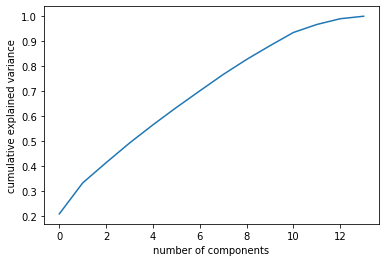

In [29]:
#memvisualisasikan cumulative explained ratio
pca = PCA()
pca_data = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [30]:
# implementasi pca sesuai grafik
n = 8
pca = PCA(n_components = n)
X_new_pca = pca.fit_transform(X_scaled)
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var, '% of total variance is explained by',n, 'principal components')

76.68715479081386 % of total variance is explained by 8 principal components


Text(0, 0.5, 'culumative explained variance')

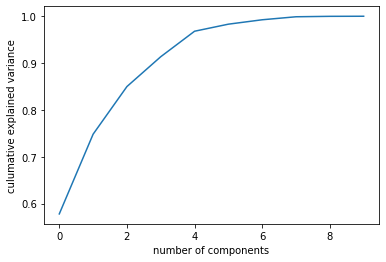

In [31]:
#memvisualisasikan cumulative explained ratio
lda = LinearDiscriminantAnalysis()
lda_data = lda.fit_transform(X_scaled, Y)

plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("culumative explained variance")

In [32]:
#mengimplementasikan LDA sesuai grafik
l = 4
lda = LinearDiscriminantAnalysis(n_components=l)
X_new_lda = lda.fit_transform(X_scaled, Y)
total_var = lda.explained_variance_ratio_.sum() * 100
print(total_var, '% of total variance is expalained by', l, 'features')

91.36003363150662 % of total variance is expalained by 4 features


In [33]:
#Train Model and Predict menggunakan data asli
Xmusix = X_scaled
Ymusix = Y
Xmusix_train, Xmusix_test, Ymusix_train, Ymusix_test = train_test_split(Xmusix, Ymusix, test_size = 0.2, random_state = 22, stratify = Ymusix)

start = time.time()
knn = KNeighborsClassifier(n_neighbors = 9).fit(Xmusix_train, Ymusix_train)
Ypred = knn.predict(Xmusix_test)
end = time.time()
print("Akurasi  : ", metrics.accuracy_score(Ymusix_test, Ypred))
print("waktu    : ", end-start)

Akurasi  :  0.4265763859500635
waktu    :  0.49196863174438477


In [34]:
#Train Model and Predict menggunakan data dengan feature selection
Xmusix = X_scaled
Ymusix = Y
Xmusix_train, Xmusix_test, Ymusix_train, Ymusix_test = train_test_split(Xmusix, Ymusix, test_size = 0.2, random_state = 22, stratify = Ymusix)

start = time.time()
select = SelectKBest(f_classif, k=8)
select.fit(X_scaled, Y)
Xnew = select.fit_transform(X_scaled, Y)
print("nilai statistik hitung tiap feature  : ", select.scores_)
print('\n',"nilai pvalue : ", select.pvalues_)
end = time.time()
print("Akurasi  : ", metrics.accuracy_score(Ymusix_test, Ypred))
print("waktu    : ", end-start)

nilai statistik hitung tiap feature  :  [139.88066056 327.57607032 607.05627169   3.44940318 533.23015937
  17.36126483 240.43782283 702.69800751 307.34168538  25.06319532
 208.2249501   28.89657946 931.21961423  25.14183356]

 nilai pvalue :  [5.67588919e-278 0.00000000e+000 0.00000000e+000 1.54594261e-004
 0.00000000e+000 8.80419429e-032 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.36713016e-047 0.00000000e+000 1.72827268e-055
 0.00000000e+000 9.41651367e-048]
Akurasi  :  0.4265763859500635
waktu    :  0.010654449462890625


In [35]:
#Train Model and Predict menggunakan data dengan PCA
Xmusix = X_scaled
Ymusix = Y
Xmusix_train, Xmusix_test, Ymusix_train, Ymusix_test = train_test_split(Xmusix, Ymusix, test_size = 0.2, random_state = 22, stratify = Ymusix)

start = time.time()
n = 8
pca = PCA(n_components = n)
X_new_pca = pca.fit_transform(X_scaled)
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var, '% of total variance is explained by',n, 'principal components')
end = time.time()
print("Akurasi  : ", metrics.accuracy_score(Ymusix_test, Ypred))
print("waktu    : ", end-start)

76.68715479081392 % of total variance is explained by 8 principal components
Akurasi  :  0.4265763859500635
waktu    :  0.022904634475708008


In [36]:
#Train Model and Predict menggunakan data dengan LDA
Xmusix = X_scaled
Ymusix = Y
Xmusix_train, Xmusix_test, Ymusix_train, Ymusix_test = train_test_split(Xmusix, Ymusix, test_size = 0.2, random_state = 22, stratify = Ymusix)

start = time.time()
l = 4
lda = LinearDiscriminantAnalysis(n_components=l)
X_new_lda = lda.fit_transform(X_scaled, Y)
total_var = lda.explained_variance_ratio_.sum() * 100
print(total_var, '% of total variance is expalained by', l, 'features')
end = time.time()
print("Akurasi  : ", metrics.accuracy_score(Ymusix_test, Ypred))
print("waktu    : ", end-start)

91.36003363150662 % of total variance is expalained by 4 features
Akurasi  :  0.4265763859500635
waktu    :  0.025643110275268555
